# Convolutional Neural Network Model
I used the Keras API,Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research.

The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. I choosed to set 32 filters for the two conv2D layers. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size  more the pooling dimension is high, more the downsampling is important.

Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.

The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

In the end i used the features in two fully-connected (Dense) layers which is just artificial an neural networks (ANN) classifier. In the last layer(Dense(len(folders), activation = 'softmax')) the net outputs distribution of probability of each class.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from glob import glob
from matplotlib import pyplot as plt

Using TensorFlow backend.


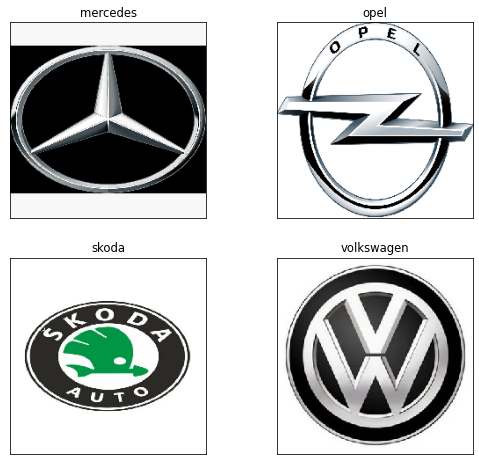

In [2]:
from matplotlib.pyplot import figure

mercedes_logo = load_img('./data/logo/mercedes.jpg', target_size = [224,224])
opel_logo = load_img('./data/logo/opel.jpg', target_size = [224,224])
skoda_logo = load_img('./data/logo/skoda.jpg', target_size = [224,224])
volkswagen_logo = load_img('./data/logo/volkswagen.jpg', target_size = [224,224])


titles = ["mercedes","opel","skoda","volkswagen"]
images = [mercedes_logo,opel_logo,skoda_logo,volkswagen_logo ]

figure(figsize=(9,8), dpi=70)
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [3]:
# resize all images to this
img_size = [224, 224]

train_path = './data/Train'
validation_path = './data/Test'

In [4]:
# geting the labels list from sub folders
folders  = glob(train_path + '/*')
print(folders)

['./data/Train\\mercedes', './data/Train\\opel', './data/Train\\skoda', './data/Train\\volkswagen']


In [5]:
# data augmentation
train_datagen = ImageDataGenerator( rescale = 1./ 255.,
                                    rotation_range = 30,
                                    shear_range = 0.95,
                                    zoom_range = 0.95,
                                    horizontal_flip = True)

validation_datagen = ImageDataGenerator( rescale = 1./255. )

train_generator = train_datagen.flow_from_directory(train_path,
                                                    batch_size =32,
                                                    target_size = img_size,
                                                    class_mode = 'categorical',
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(validation_path,
                                                              batch_size = 32,
                                                              target_size = img_size,
                                                              class_mode = 'categorical',
                                                              shuffle=True)

Found 1287 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [6]:
#for data in train_generator:
#    print(data[0].shape,data[1].shape)
print(validation_generator)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation = 'relu', input_shape = (224,224,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(len(folders), activation = 'softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 89888)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               11505792  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 5

In [9]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [10]:
history = model.fit(train_generator,
                    epochs = 200,
                    steps_per_epoch = 5,
                    verbose = 1,
                    validation_data = validation_generator,
                    validation_steps = 5)

Epoch 1/200
5/5 [==============================] - 11s 2s/step - loss: 3.6495 - accuracy: 0.2313 - val_loss: 1.4366 - val_accuracy: 0.2875
Epoch 2/200
5/5 [==============================] - 9s 2s/step - loss: 1.4208 - accuracy: 0.2062 - val_loss: 1.3850 - val_accuracy: 0.2562
Epoch 3/200
5/5 [==============================] - 10s 2s/step - loss: 1.3848 - accuracy: 0.3125 - val_loss: 1.3861 - val_accuracy: 0.2375
Epoch 4/200
5/5 [==============================] - 9s 2s/step - loss: 1.3825 - accuracy: 0.3063 - val_loss: 1.3721 - val_accuracy: 0.2688
Epoch 5/200
5/5 [==============================] - 10s 2s/step - loss: 1.3842 - accuracy: 0.2438 - val_loss: 1.3795 - val_accuracy: 0.2438
Epoch 6/200
5/5 [==============================] - 9s 2s/step - loss: 1.3787 - accuracy: 0.3063 - val_loss: 1.3793 - val_accuracy: 0.2438
Epoch 7/200
5/5 [==============================] - 10s 2s/step - loss: 1.3847 - accuracy: 0.2562 - val_loss: 1.3826 - val_accuracy: 0.2375
Epoch 8/200
5/5 [=============

Epoch 60/200
5/5 [==============================] - 10s 2s/step - loss: 1.3283 - accuracy: 0.3500 - val_loss: 1.2998 - val_accuracy: 0.3313
Epoch 61/200
5/5 [==============================] - 9s 2s/step - loss: 1.3278 - accuracy: 0.3313 - val_loss: 1.3093 - val_accuracy: 0.3438
Epoch 62/200
5/5 [==============================] - 9s 2s/step - loss: 1.3398 - accuracy: 0.3812 - val_loss: 1.3167 - val_accuracy: 0.3688
Epoch 63/200
5/5 [==============================] - 9s 2s/step - loss: 1.3432 - accuracy: 0.3812 - val_loss: 1.3223 - val_accuracy: 0.3688
Epoch 64/200
5/5 [==============================] - 9s 2s/step - loss: 1.3722 - accuracy: 0.3125 - val_loss: 1.3244 - val_accuracy: 0.3625
Epoch 65/200
5/5 [==============================] - 9s 2s/step - loss: 1.3494 - accuracy: 0.2875 - val_loss: 1.2889 - val_accuracy: 0.3812
Epoch 66/200
5/5 [==============================] - 9s 2s/step - loss: 1.3271 - accuracy: 0.4313 - val_loss: 1.2768 - val_accuracy: 0.3625
Epoch 67/200
5/5 [========

5/5 [==============================] - 12s 2s/step - loss: 1.2763 - accuracy: 0.4563 - val_loss: 1.1336 - val_accuracy: 0.5000
Epoch 119/200
5/5 [==============================] - 12s 2s/step - loss: 1.1308 - accuracy: 0.4750 - val_loss: 1.0724 - val_accuracy: 0.5875
Epoch 120/200
5/5 [==============================] - 12s 2s/step - loss: 1.2401 - accuracy: 0.4563 - val_loss: 1.0753 - val_accuracy: 0.5813
Epoch 121/200
5/5 [==============================] - 12s 2s/step - loss: 1.2167 - accuracy: 0.4750 - val_loss: 1.0642 - val_accuracy: 0.6000
Epoch 122/200
5/5 [==============================] - 12s 2s/step - loss: 1.2337 - accuracy: 0.4875 - val_loss: 1.0363 - val_accuracy: 0.5875
Epoch 123/200
5/5 [==============================] - 12s 2s/step - loss: 1.2365 - accuracy: 0.4688 - val_loss: 1.0793 - val_accuracy: 0.5813
Epoch 124/200
5/5 [==============================] - 12s 2s/step - loss: 1.1534 - accuracy: 0.4563 - val_loss: 1.0468 - val_accuracy: 0.5813
Epoch 125/200
5/5 [========

5/5 [==============================] - 12s 2s/step - loss: 1.1210 - accuracy: 0.4812 - val_loss: 1.0117 - val_accuracy: 0.6125
Epoch 177/200
5/5 [==============================] - 11s 2s/step - loss: 1.1728 - accuracy: 0.5688 - val_loss: 1.0249 - val_accuracy: 0.6187
Epoch 178/200
5/5 [==============================] - 12s 2s/step - loss: 1.1292 - accuracy: 0.5250 - val_loss: 0.9653 - val_accuracy: 0.6500
Epoch 179/200
5/5 [==============================] - 12s 2s/step - loss: 1.1173 - accuracy: 0.5125 - val_loss: 0.9613 - val_accuracy: 0.6000
Epoch 180/200
5/5 [==============================] - 12s 2s/step - loss: 1.1297 - accuracy: 0.4938 - val_loss: 1.0713 - val_accuracy: 0.5625
Epoch 181/200
5/5 [==============================] - 10s 2s/step - loss: 1.1431 - accuracy: 0.5437 - val_loss: 0.9363 - val_accuracy: 0.6313
Epoch 182/200
5/5 [==============================] - 10s 2s/step - loss: 1.1386 - accuracy: 0.5437 - val_loss: 0.9766 - val_accuracy: 0.5938
Epoch 183/200
5/5 [========

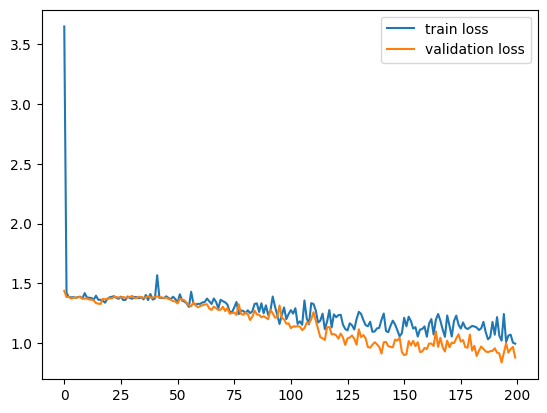

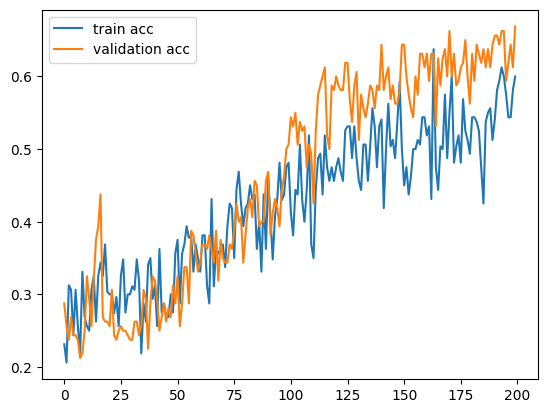

In [11]:
# plot the loss
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()


#plot the accuracy
plt.plot(history.history['accuracy'], label = 'train acc')
plt.plot(history.history['val_accuracy'], label = 'validation acc')
plt.legend()
plt.show()


In [12]:
model.save_weights('./model/carbrand_cnn.h5')
print('Saved model to disk!')

# load the model

#model.load_weights('./model/carbrand_cnn.h5')
#print('Loaded model from disk!')

Saved model to disk!


In [13]:
# predicting the test set
y_pred = model.predict(validation_generator)

y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([2, 0, 0, 2, 3, 2, 1, 3, 3, 0, 2, 0, 3, 0, 1, 0, 3, 0, 3, 3, 2, 3,
       0, 0, 0, 1, 3, 3, 0, 3, 0, 1, 3, 0, 3, 3, 1, 3, 3, 0, 0, 2, 3, 3,
       2, 3, 0, 3, 0, 2, 3, 3, 0, 2, 0, 3, 2, 3, 0, 3, 0, 2, 2, 3, 2, 3,
       3, 3, 0, 0, 0, 0, 0, 3, 2, 2, 2, 0, 1, 3, 2, 3, 3, 3, 3, 2, 1, 0,
       3, 2, 0, 0, 2, 0, 2, 3, 2, 1, 0, 2, 3, 0, 1, 0, 2, 2, 1, 3, 0, 0,
       1, 1, 0, 3, 3, 2, 2, 1, 0, 3, 0, 2, 1, 2, 0, 3, 0, 2, 3, 0, 0, 3,
       3, 1, 3, 3, 0, 0, 0, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 1, 0, 3,
       1, 2, 0, 1, 3, 0, 0, 1, 0, 0, 3, 2, 3, 3, 0, 0, 2, 0, 3, 1, 3, 1,
       3, 1, 3, 2, 2, 3, 1, 1, 2, 2, 3, 0, 2, 2, 3, 0, 0, 3, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [14]:
# load and use the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from glob import glob

In [15]:
#glob() File wildcards
folders = glob('./data/Train/*')
print(folders)
labels = []

for path in folders:
    l = path.split('/')
    print(l)
    label = l[-1].upper()
    labels.append(label)
labels.sort()
print(labels)

['./data/Train\\mercedes', './data/Train\\opel', './data/Train\\skoda', './data/Train\\volkswagen']
['.', 'data', 'Train\\mercedes']
['.', 'data', 'Train\\opel']
['.', 'data', 'Train\\skoda']
['.', 'data', 'Train\\volkswagen']
['TRAIN\\MERCEDES', 'TRAIN\\OPEL', 'TRAIN\\SKODA', 'TRAIN\\VOLKSWAGEN']


TRAIN\VOLKSWAGEN


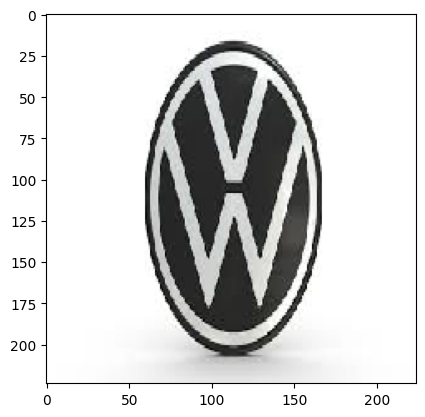

In [16]:
def Predict_Brand(image_path, image_size = [224, 224], labels = labels, model = model):
    img = load_img(image_path, target_size = image_size)
    x = image.img_to_array(img).astype(float)
    x = x / 255.
    x = np.expand_dims(x, axis = 0)
    result = model.predict(x)
    result = np.argmax(result, axis = 1)
    return labels[result[0]]

result = Predict_Brand('./data/Test/volkswagen/images60.jpg')
img = load_img('./data/Test/volkswagen/images60.jpg', target_size = [224,224])
plt.imshow(img)
print(result)

TRAIN\MERCEDES


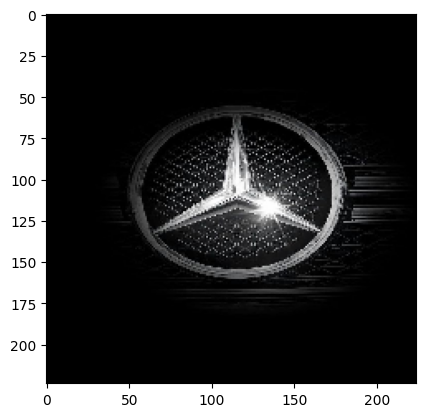

In [17]:
result = Predict_Brand('./data/Test/mercedes/mrc21.jpg')
img = load_img('./data/Test/mercedes/mrc21.jpg', target_size = [224,224])
plt.imshow(img)
print(result)